# IMPORTING LIBRARIES

In [1]:
import matplotlib.pyplot as plt            
from tabulate import tabulate               
import matplotlib as mat                    
import seaborn as sns                      
import pandas as pd                         
import numpy as np

# READING THE DATASET

In [2]:
df = pd.read_csv("datacredit.csv")
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


# NO OF ROWS & COLUMNS

In [3]:
df.shape

(100000, 24)

# UNDERSTANDING THE DATA

## SEPERATING THE CATEGORICAL AND CONTINUOUS VARIAVLES

In [4]:
# Seprating out the categorical and continuous variables
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:                # looping on the number of columns
        if df[column].nunique() < 100:       # nunique:  returns unique values in the column,
                                             #here 100 is the hyperparamter and can be changed
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 

 # Calling the function
categorical, continuous = seprate_data_types(df)        

# print the data sets in table format
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "Continuous": continuous}, headers = ["categorical", "continuous"]))

categorical          continuous
-------------------  ----------------
TARGET               SK_ID_CURR
NAME_CONTRACT_TYPE   AMT_INCOME_TOTAL
GENDER               AMT_CREDIT
Car                  AMT_GOODS_PRICE
House                DAYS_EMPLOYED
CNT_CHILDREN
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
MOBILE
WORK_PHONE
HOME_PHONE
MOBILE_REACHABLE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
APPLICATION_DAY
TOTAL_DOC_SUBMITTED


## IDENTIFYING MISSING VALUES, if any

In [5]:
empty = df.isnull().sum()
empty

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

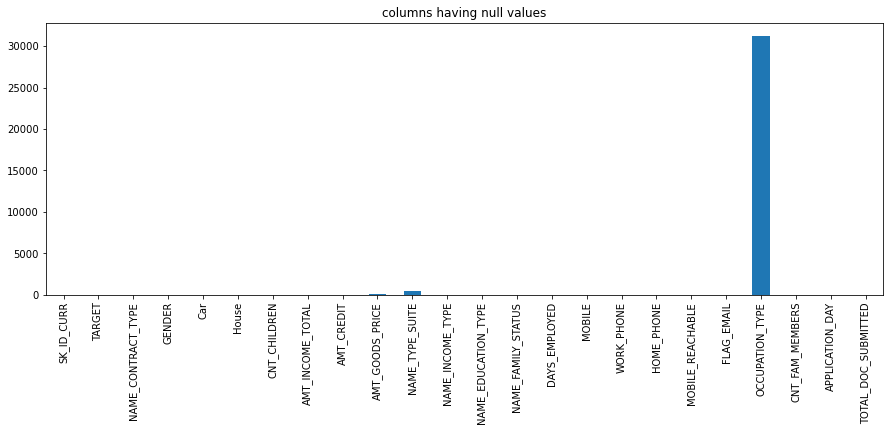

In [6]:
plt.figure(figsize= (15,5))
empty.plot(kind = 'bar')
plt.title ('columns having null values')
plt.show()

### FILLING OF MISSING VALUES FOR OCCUPATION_TYPE

In [7]:
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna('N.A.')

since, missing value in OCCUPATION_TYPE is very high, precisely more than 30%, the null value are replaced with N.A.

## DROP OF ROWS WITH MISSING VALUES

In [8]:
df = df.dropna()
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


### CHECKING IF MISSING VALUE ARE REMOVED SUCCESSFULLY.

In [9]:
df.isnull().sum()

SK_ID_CURR             0
TARGET                 0
NAME_CONTRACT_TYPE     0
GENDER                 0
Car                    0
House                  0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_GOODS_PRICE        0
NAME_TYPE_SUITE        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
DAYS_EMPLOYED          0
MOBILE                 0
WORK_PHONE             0
HOME_PHONE             0
MOBILE_REACHABLE       0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
APPLICATION_DAY        0
TOTAL_DOC_SUBMITTED    0
dtype: int64

## DROP OF COLUMNS WHICH ARE IRRELEVANT TO LOAN APPROVAL ANALYSIS TO SHOW CORRELATION COEFFICIENT OF VARIABLES

In [10]:
df = df.drop(['DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE', 'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL'], axis = 1)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,Family,State servant,Higher education,Married,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,Unaccompanied,Working,Secondary / secondary special,Married,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,Unaccompanied,Commercial associate,Higher education,Married,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,Family,Commercial associate,Secondary / secondary special,Married,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,Sales staff,2.0,FRIDAY,2


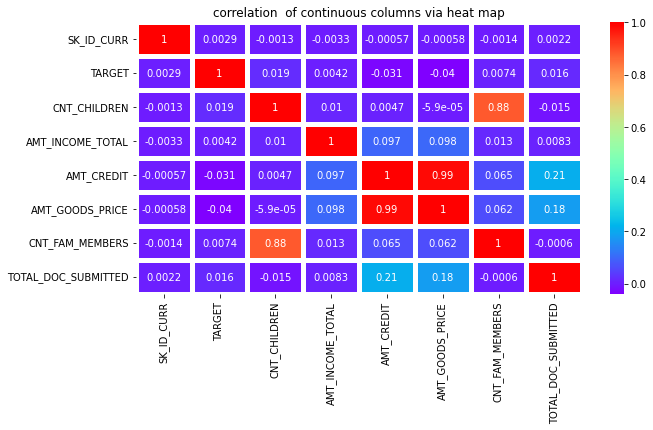

In [11]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.heatmap(df.corr(), cmap = 'rainbow', annot = True, linewidth = 5).set_title('correlation  of continuous columns via heat map')
plt.show()

### INTERPRETATION:  the heat map shows a direct correlation of variables, apart from the variable itself, the columns where correlation is near to 1.0 are: 

AMT_GOODS_PRICE TO AMT_CREDIT

CNT_FAM_MEMBERS TO CNT_CHILDREN

### NO OF ROWS & COLUMNS AFTER MISSING VALUE TREATMENT & DROP OF COLUMNS

In [12]:
df.shape

(99595, 18)

### INTERPRETATION: rows with missing values are removed as in approval of loan application all the details are necesary and vital to undestand the credit worthiness of the applicant.

## IDENTIFYING OUTLIERS

In [13]:
def dfoutliers(df, col):
    
    Q3 = np.quantile(df[col], 0.75)
    Q1 = np.quantile(df[col], 0.25)
    
    IQR = Q3 - Q1
    
    global list_df
    global outliers_df
    
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    
    print('the lower range of ', col, 'is', lower_range)
    print('the upper range of ', col, 'is', upper_range)
    
    list_df = [x for x in df[col] if ((x < lower_range) | (x > upper_range))]
    print('total outliers in ', col, 'are', len(list_df))
    outliers_df = df.loc[df[col].isin(list_df)]
    
k = ['AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'AMT_CREDIT']

for i in  k:
    print(i)
    dfoutliers(df, i)
    print('****************************************')

AMT_INCOME_TOTAL
the lower range of  AMT_INCOME_TOTAL is -22500.0
the upper range of  AMT_INCOME_TOTAL is 337500.0
total outliers in  AMT_INCOME_TOTAL are 4538
****************************************
AMT_GOODS_PRICE
the lower range of  AMT_GOODS_PRICE is -423000.0
the upper range of  AMT_GOODS_PRICE is 1341000.0
total outliers in  AMT_GOODS_PRICE are 4804
****************************************
AMT_CREDIT
the lower range of  AMT_CREDIT is -537975.0
the upper range of  AMT_CREDIT is 1616625.0
total outliers in  AMT_CREDIT are 2133
****************************************


### INTERPRETATION: outliers treatment have been done on AMT_INCOME_TOTAL, AMT_GOODS_PRICE, AMT_CREDIT to find out any lower and upper limit for approval of loan.

## FILTERING THE OUTLIERS OUT FROM THE MAIN DATASET AND CREATING A NEW DATAFRAME ON WHOM LOAN APPROVAL ANALYSIS MAY BE DONE

In [14]:
df1 = df[(df.AMT_INCOME_TOTAL < 360000)
        &(df.AMT_GOODS_PRICE < 1361250)
        &(df.AMT_CREDIT < 1655583.75)]

print('list of applicants who are finalized for further loan approval analysis:')

df1

list of applicants who are finalized for further loan approval analysis:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,Family,State servant,Higher education,Married,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,Unaccompanied,Working,Secondary / secondary special,Married,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,Unaccompanied,Commercial associate,Higher education,Married,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,Family,Commercial associate,Secondary / secondary special,Married,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,Sales staff,2.0,FRIDAY,2


In [15]:
print('no of applicants who are finalized for further loan approval analysis: ', df1.shape[0])

no of applicants who are finalized for further loan approval analysis:  93036


## DESCRIPTION OF THE NEW DATAFRAME

In [16]:
df1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,TOTAL_DOC_SUBMITTED
count,93036.000000,93036.000000,93036.000000,93036.000000,9.303600e+04,9.303600e+04,93036.000000,93036.000000
mean,157993.103498,0.082850,0.414710,152864.000119,5.520365e+05,4.936444e+05,2.148244,0.925470
std,33478.793383,0.275656,0.718946,63669.380280,3.396092e+05,3.072671e+05,0.909274,0.336925
min,100002.000000,0.000000,0.000000,25650.000000,4.500000e+04,4.500000e+04,1.000000,0.000000
25%,129062.500000,0.000000,0.000000,112500.000000,2.700000e+05,2.295000e+05,2.000000,1.000000
50%,157872.500000,0.000000,0.000000,135000.000000,4.945500e+05,4.500000e+05,2.000000,1.000000
75%,186940.250000,0.000000,1.000000,189000.000000,7.702920e+05,6.750000e+05,3.000000,1.000000
max,216090.000000,1.000000,12.000000,359100.000000,1.649376e+06,1.359000e+06,14.000000,4.000000


## CREATION OF BINS FOR AMT_INCOME_TOTAL, AMT_GOODS_PRICE, AMT_CREDIT

In [17]:
bins = [0, 100000, 200000, 300000, 400000]
slot = ['below 100000',
        '100000-200000',
        '200000-300000',
        '300000 & above']

df1['AMT_INCOME_RANGE']=pd.cut(df1['AMT_INCOME_TOTAL'],bins,labels=slot)

C:\Users\PAL\AppData\Local\Temp/ipykernel_10764/4140892803.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['AMT_INCOME_RANGE']=pd.cut(df1['AMT_INCOME_TOTAL'],bins,labels=slot)


In [18]:
bins = [0, 200000, 400000, 600000, 800000, 1000000, 1200000, 1400000]
slot = ['below 200000',
        '200000-400000',
        '400000-600000',
        '600000-800000',
        '800000-1000000',
        '1000000-1200000',
        '1200000 & above']

df1['AMT_GOODS_RANGE']=pd.cut(df1['AMT_GOODS_PRICE'],bins,labels=slot)

C:\Users\PAL\AppData\Local\Temp/ipykernel_10764/214496686.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['AMT_GOODS_RANGE']=pd.cut(df1['AMT_GOODS_PRICE'],bins,labels=slot)


In [19]:
bins = [0, 200000, 400000, 600000, 800000, 1000000, 1200000, 1400000, 1600000, 1800000]
slot = ['below 200000',
        '200000-400000',
        '400000-600000',
        '600000-800000',
        '800000-1000000',
        '1000000-1200000',
        '1200000-1400000',
        '1400000-1600000',
        '1600000 & above']

df1['AMT_CREDIT_RANGE']=pd.cut(df1['AMT_CREDIT'],bins,labels=slot)

C:\Users\PAL\AppData\Local\Temp/ipykernel_10764/2607220121.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['AMT_CREDIT_RANGE']=pd.cut(df1['AMT_CREDIT'],bins,labels=slot)


### 1. ANALYSIS OF AMT_CREDIT_RANGE INTERMS OF AMT_GOODS_RANGE as these columns shows a correlation near to 1.0

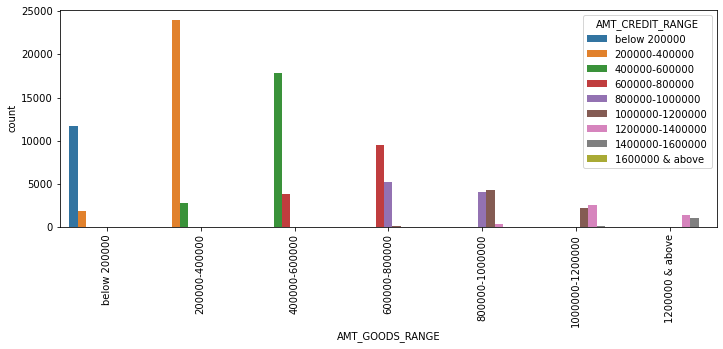

In [20]:
z = ['AMT_GOODS_RANGE']

enumerate(z)

list_z = list(enumerate(z))

plt.figure(figsize = (40,4))

for i in list_z:
    plt.subplot(1, 3, i[0]+1)
    plt.subplots_adjust(hspace=0.9)
    sns.countplot(x = i[1], hue = 'AMT_CREDIT_RANGE', data = df1)
    plt.xticks(rotation = 90)

### 2. ANALYSIS OF CNT_CHILDREN INTERMS OF CNT_FAM_MEMBERS as these columns shows a correlation near to 1.0

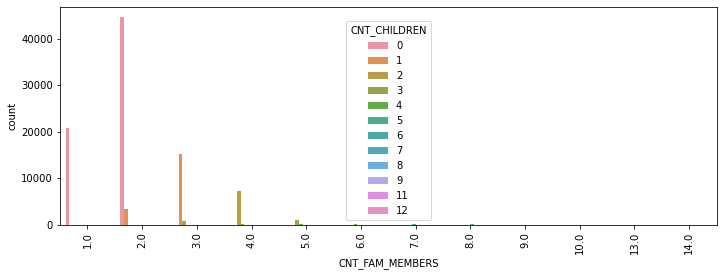

In [21]:
z = ['CNT_FAM_MEMBERS']

enumerate(z)

list_z = list(enumerate(z))

plt.figure(figsize = (40,4))

for i in list_z:
    plt.subplot(1, 3, i[0]+1)
    plt.subplots_adjust(hspace=0.9)
    sns.countplot(x = i[1], hue = 'CNT_CHILDREN', data = df1)
    plt.xticks(rotation = 90)

## Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

In [22]:
t0 = df1.loc[df1["TARGET"]==0]

t1 = df1.loc[df1["TARGET"]==1]

#print('TARGET = 0 ',t0)
#print('TARGET = 1 ',t1)

print('Count of target = 0:', len(t0))
print('Count of target = 1:', len(t1))

Count of target = 0: 85328
Count of target = 1: 7708


In [23]:
percentage_t0=round(100*len(t0)/(len(t0)+len(t1)))
print('Percentage of target = 0: ', percentage_t0, '%' )

percentage_t1= round(100*len(t1)/(len(t0)+len(t1)))
print('Percentage of target = 1: ', percentage_t1, '%' )

Percentage of target = 0:  92 %
Percentage of target = 1:  8 %


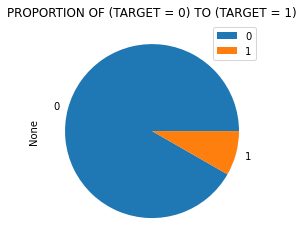

In [24]:
df1.groupby('TARGET').size().plot(kind='pie', legend=True)
plt.title('PROPORTION OF (TARGET = 0) TO (TARGET = 1)')
plt.show()

# UNIVARIATE ANALYSIS

### 1. ANALYSIS OF TARGET IN RESPECT TO AMT_INCOME_TOTAL, AMT_GOODS_PRICE, AMT_CREDIT

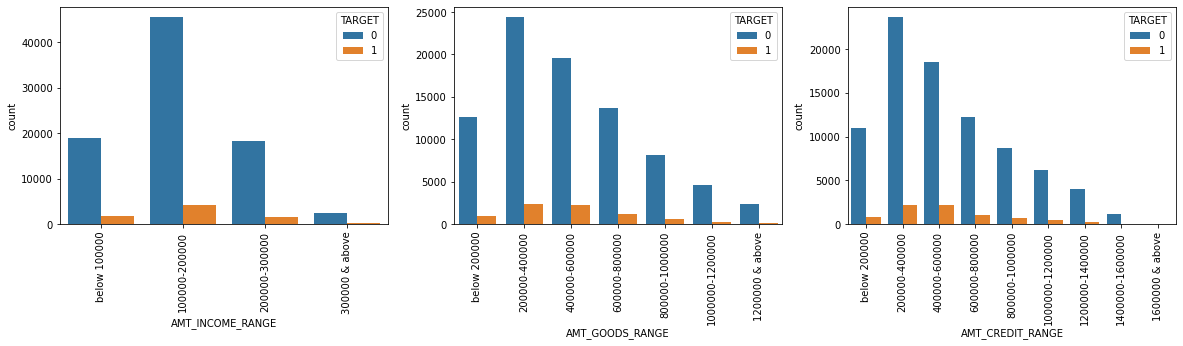

In [25]:
z = ['AMT_INCOME_RANGE',
     'AMT_GOODS_RANGE',
     'AMT_CREDIT_RANGE']

enumerate(z)

list_z = list(enumerate(z))

plt.figure(figsize = (20,4))

for i in list_z:
    plt.subplot(1, 3, i[0]+1)
    plt.subplots_adjust(hspace=0.9)
    sns.countplot(x = i[1], hue = 'TARGET', data = df1)
    plt.xticks(rotation = 90)

### INTERPRETATIONS: 

### 2. ANALYSIS OF TARGET IN RESPECT TO NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_FAMILY_STATUS, NAME_CONTRACT_TYPE 

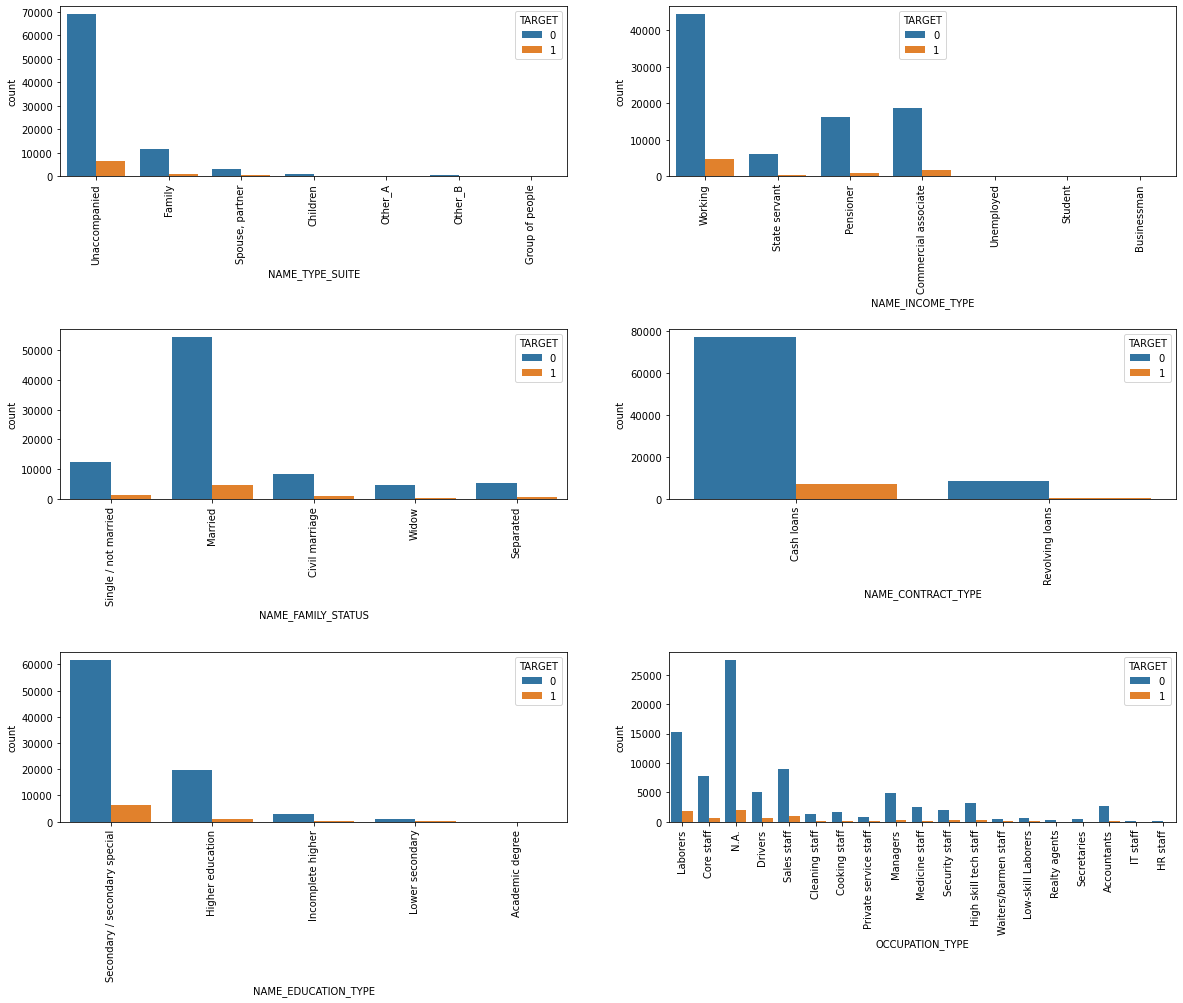

In [26]:
z = ['NAME_TYPE_SUITE', 
     'NAME_INCOME_TYPE', 
     'NAME_FAMILY_STATUS', 
     'NAME_CONTRACT_TYPE',
     'NAME_EDUCATION_TYPE',
     'OCCUPATION_TYPE']

enumerate(z)

list_z = list(enumerate(z))

plt.figure(figsize = (20,15))

for i in list_z:
    plt.subplot(3, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.9)
    sns.countplot(x = i[1], hue = 'TARGET', data = df1)
    plt.xticks(rotation = 90)

### GROUPING OF SIFFERENT COLUMNS IN TERMS OF TARGET

In [27]:
a = df1.groupby(by = ['NAME_INCOME_TYPE'])['TARGET'].value_counts()
print(a)
b = df1.groupby(by = ['NAME_TYPE_SUITE'])['TARGET'].value_counts()
print(b)
c = df1.groupby(by = ['NAME_FAMILY_STATUS'])['TARGET'].value_counts()
print(c)
d = df1.groupby(by = ['NAME_CONTRACT_TYPE'])['TARGET'].value_counts()
print(d)
e = df1.groupby(by = ['NAME_EDUCATION_TYPE'])['TARGET'].value_counts()
print(e)

NAME_INCOME_TYPE      TARGET
Businessman           0             1
Commercial associate  0         18764
                      1          1575
Pensioner             0         16216
                      1           945
State servant         0          5956
                      1           385
Student               0             9
Unemployed            0             5
                      1             4
Working               0         44377
                      1          4799
Name: TARGET, dtype: int64
NAME_TYPE_SUITE  TARGET
Children         0           945
                 1            87
Family           0         11380
                 1           972
Group of people  0            77
                 1             5
Other_A          0           244
                 1            22
Other_B          0           481
                 1            50
Spouse, partner  0          3219
                 1           271
Unaccompanied    0         68982
                 1          6301
Na

### INTERPRETATIONS: 

### 3. ANALYSIS OF TARGET IN RESPECT TO GENDER, CAR, HOUSE, CNT_CHILDREN

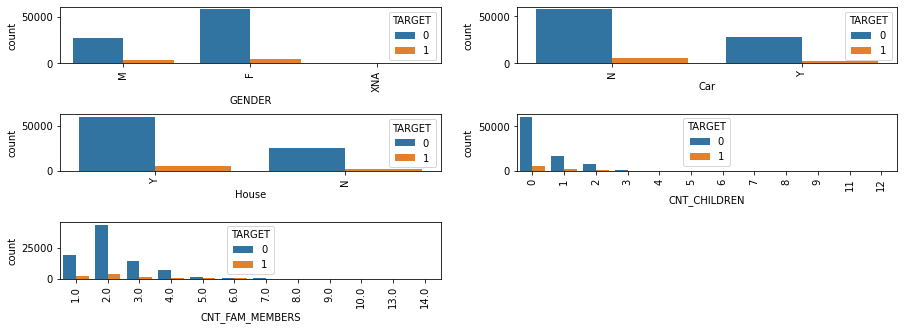

In [28]:
z = ['GENDER', 
     'Car', 
     'House', 
     'CNT_CHILDREN',
     'CNT_FAM_MEMBERS']

enumerate(z)

list_z = list(enumerate(z))

plt.figure(figsize = (15,5))

for i in list_z:
    plt.subplot(3, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.9)
    sns.countplot(x = i[1], hue = 'TARGET', data = df1)
    plt.xticks(rotation = 90)

### INTERPRETATIONS: the above graph shows proportion of target = 0 and target = 1 on basis of different aspects.

# BIVARIATE ANALYSIS

### 1. ANALYSIS OF NAME_INCOME_TYPE & AMT_INCOME_TOTAL WHERE TARGET = 0 IN RESPECT TO NAME_FAMILY_STATUS

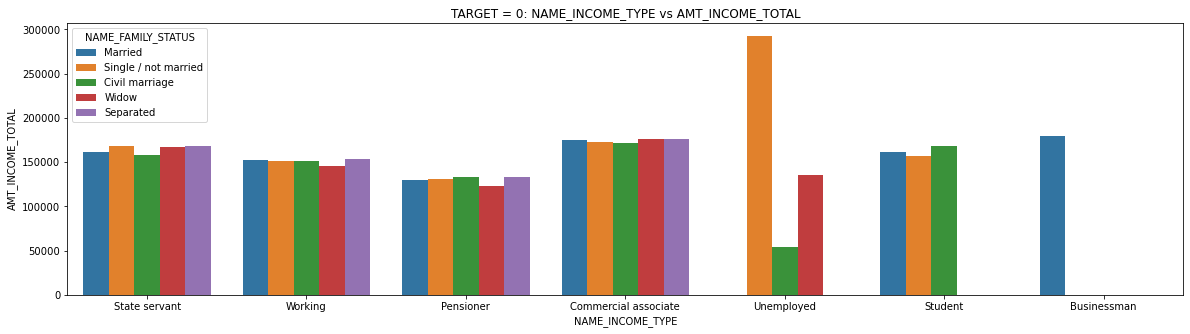

In [29]:
plt.figure(figsize=(20,5))
sns.barplot(data = t0, x='NAME_INCOME_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS', ci = None)
plt.title('TARGET = 0: NAME_INCOME_TYPE vs AMT_INCOME_TOTAL')
plt.show()

### INTERPRETATION: when target = 0, the graph shows population of non defaulters in different income type in respect to their family status.

### 2. ANALYSIS OF AMT_INCOME_RANGE & AMT_CREDIT WHERE TARGET = 0 IN RESPECT TO NAME_EDUCATION_TYPE

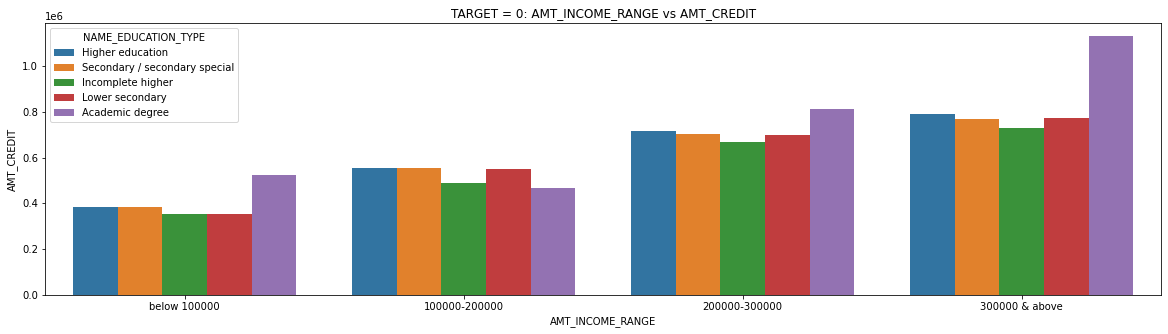

In [30]:
plt.figure(figsize=(20,5))
sns.barplot(data = t0, x='AMT_INCOME_RANGE',y='AMT_CREDIT', hue ='NAME_EDUCATION_TYPE', ci = None)
plt.title('TARGET = 0: AMT_INCOME_RANGE vs AMT_CREDIT')
plt.show()

### INTERPRETATION: when target = 0, the graph shows population of non defaulters in different income range in respect to their education degree.

### 3. ANALYSIS OF NAME_INCOME_TYPE & AMT_INCOME_TOTAL WHERE TARGET = 1 IN RESPECT TO NAME_FAMILY_STATUS

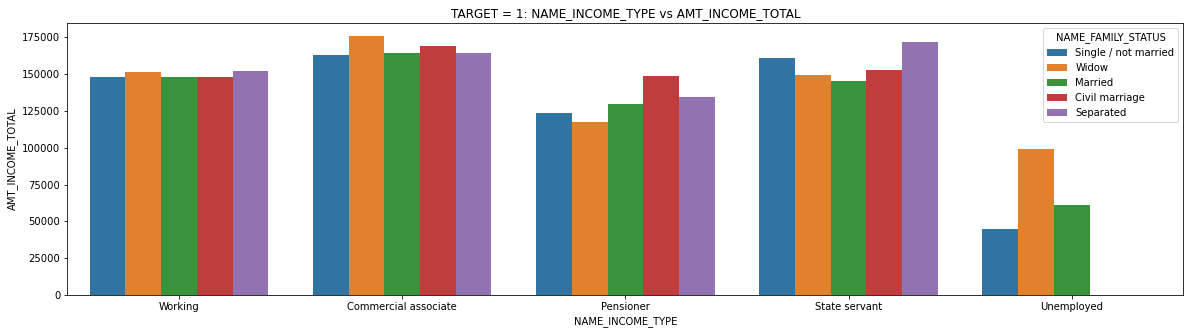

In [31]:
plt.figure(figsize=(20,5))
sns.barplot(data = t1, x='NAME_INCOME_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS', ci = None)

plt.title('TARGET = 1: NAME_INCOME_TYPE vs AMT_INCOME_TOTAL')
plt.show()

### INTERPRETATION: when target = 1, the graph shows population of defaulters in different income type in respect to their family status.

### 4. ANALYSIS OF AMT_INCOME_RANGE & AMT_CREDIT WHERE TARGET = 1 IN RESPECT TO NAME_EDUCATION_TYPE

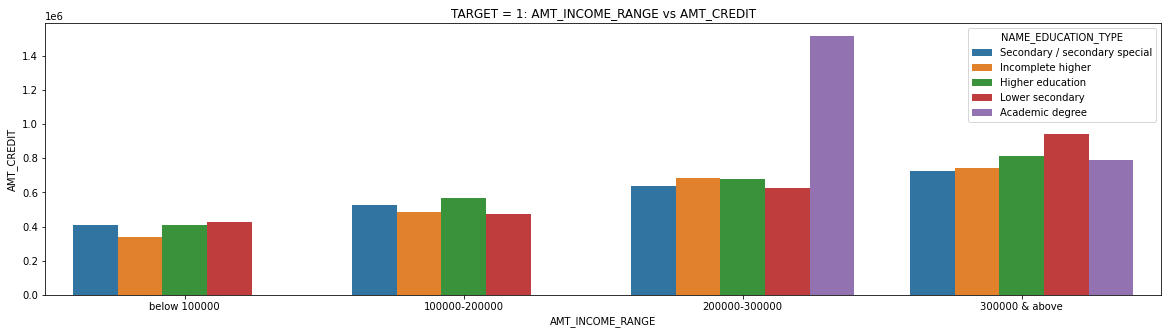

In [32]:
plt.figure(figsize=(20,5))
sns.barplot(data = t1, x='AMT_INCOME_RANGE',y='AMT_CREDIT', hue ='NAME_EDUCATION_TYPE', ci = None)
plt.title('TARGET = 1: AMT_INCOME_RANGE vs AMT_CREDIT')
plt.show()

### INTERPRETATION: when target = 1, the graph shows population of defaulters in different income range in respect to their education degree.

# FINAL LIST

In [38]:
df_final = df1[(df1.TOTAL_DOC_SUBMITTED > 0)
              &(df1.AMT_INCOME_TOTAL > 100000)
              &(df1.AMT_CREDIT > 200000)
              &((df1.NAME_EDUCATION_TYPE != 'Lower secondary'))
              &((df1.NAME_FAMILY_STATUS != 'Civil marriage'))
              &(df.CNT_FAM_MEMBERS < 4)]
df_final

C:\Users\PAL\AppData\Local\Temp/ipykernel_10764/1587985626.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_final = df1[(df1.TOTAL_DOC_SUBMITTED > 0)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED,AMT_INCOME_RANGE,AMT_GOODS_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,Working,Secondary / secondary special,Single / not married,Laborers,1.0,WEDNESDAY,1,200000-300000,200000-400000,400000-600000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,State servant,Higher education,Married,Core staff,2.0,MONDAY,1,200000-300000,1000000-1200000,1200000-1400000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,Working,Secondary / secondary special,Single / not married,Core staff,1.0,THURSDAY,1,100000-200000,400000-600000,400000-600000
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,913500.0,...,Pensioner,Secondary / secondary special,Married,N.A.,2.0,WEDNESDAY,1,100000-200000,800000-1000000,1000000-1200000
10,100014,0,Cash loans,F,N,Y,1,112500.0,652500.0,652500.0,...,Working,Higher education,Married,Core staff,3.0,SATURDAY,1,100000-200000,600000-800000,600000-800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99989,216080,0,Cash loans,F,N,Y,0,180000.0,1546020.0,1350000.0,...,Working,Secondary / secondary special,Married,Laborers,2.0,MONDAY,1,100000-200000,1200000 & above,1400000-1600000
99994,216085,0,Cash loans,M,Y,N,0,225000.0,612000.0,612000.0,...,Working,Secondary / secondary special,Married,Laborers,2.0,SATURDAY,1,200000-300000,600000-800000,600000-800000
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,Working,Secondary / secondary special,Married,Sales staff,3.0,MONDAY,1,100000-200000,600000-800000,600000-800000
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,Commercial associate,Higher education,Married,Managers,3.0,TUESDAY,1,200000-300000,200000-400000,200000-400000


In [39]:
percentage_approval_1 = 100*(df_final.shape[0]/100000)
print('percentage of final approval dataset to initial dataset is: ',percentage_approval_1,'%')

percentage of final approval dataset to initial dataset is:  49.164 %


In [40]:
percentage_approval_2 = 100*(df_final.shape[0]/df1.shape[0])
print('percentage of final approval dataset to relevant dataset is: ',percentage_approval_2,'%')

percentage of final approval dataset to relevant dataset is:  52.84406036373017 %


### TRANSFERRING FINAL APPROVAL LIST TO CSV FORMAT

In [41]:
df_final.to_csv('PreetiPal_DSFT4_C6_S4_Hackathon_excel.csv')